<a href="https://colab.research.google.com/github/XpradeepX/5C/blob/main/5C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install opencv-python numpy

In [5]:
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

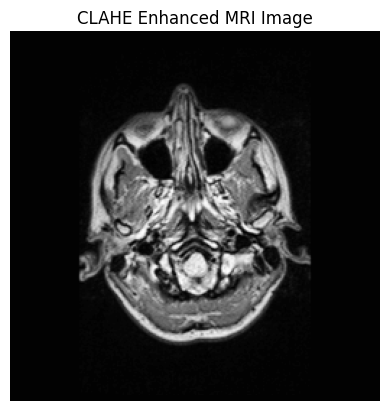

In [15]:
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Load the image using Pillow
img = Image.open('/content/drive/MyDrive/TCGA_FG_A60K_20040224_9.tif')

# Convert the PIL Image to a NumPy array
img_np = np.array(img)

# Convert the image to grayscale if it's not already grayscale
if len(img_np.shape) == 3:  # Check if the image has more than 1 channel (e.g., RGB)
    img_np = cv2.cvtColor(img_np, cv2.COLOR_RGB2GRAY)

# Create a CLAHE object with a clip limit and tile grid size
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))

# Check image data type and convert to uint8 if necessary
if img_np.dtype != np.uint8 and img_np.dtype != np.uint16:
    if img_np.dtype == np.float32 or img_np.dtype == np.float64:  # Check for float types
        img_np = (img_np * 255).astype(np.uint8)  # Scale and convert to uint8
    else:
        img_np = img_np.astype(np.uint8)

# Apply CLAHE to the NumPy array (grayscale image)
clahe_image = clahe.apply(img_np)

# Display the enhanced image
plt.imshow(clahe_image, cmap='gray')
plt.title('CLAHE Enhanced MRI Image')
plt.axis('off')  # Optional: Turn off axis labels
plt.show()


In [18]:
from PIL import Image

clahe_image_pil = Image.fromarray(clahe_image)
clahe_image_pil.save('clahe_enhanced_mri_image.tif')


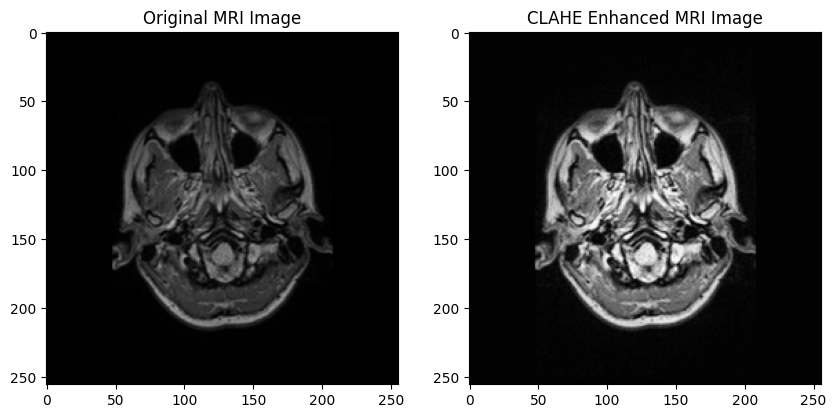

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(img, cmap='gray')
axes[0].set_title('Original MRI Image')

axes[1].imshow(clahe_image, cmap='gray')
axes[1].set_title('CLAHE Enhanced MRI Image')

plt.show()
